In [187]:
#PROJECT:FLIGHT FARE PREDICTION
#Airfare prices are influenced by a wide range of dynamic factors such as airline, date of journey, departure and arrival times, total travel duration, number of stops,and more. 
#These factors make it challenging for travelers to predict or find the best flight prices, and for companies to analyze pricing patterns.

#Flight Fare Prediction involves using machine learning techniques to predict the cost of flight tickets based on historical data and relevant features. 
#By training predictive models on such data, we can estimate prices for future flights with considerable accuracy.

#This project aims to:

#Explore and analyze the features affecting flight prices.

#Build regression models that can accurately predict flight fares.

#Compare the performance of various machine learning algorithms like Random Forest, XGBoost, and Linear Regression.

#Provide insights that can help users or businesses make informed decisions regarding flight bookings.



In [188]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [189]:
#DATA LOAD

In [190]:
data=pd.read_csv('Flight_Fare.csv')

In [191]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [192]:
#EDA

In [193]:
data.shape

(10683, 11)

In [194]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [195]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [196]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [198]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [199]:
data.dropna(inplace=True)

In [200]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

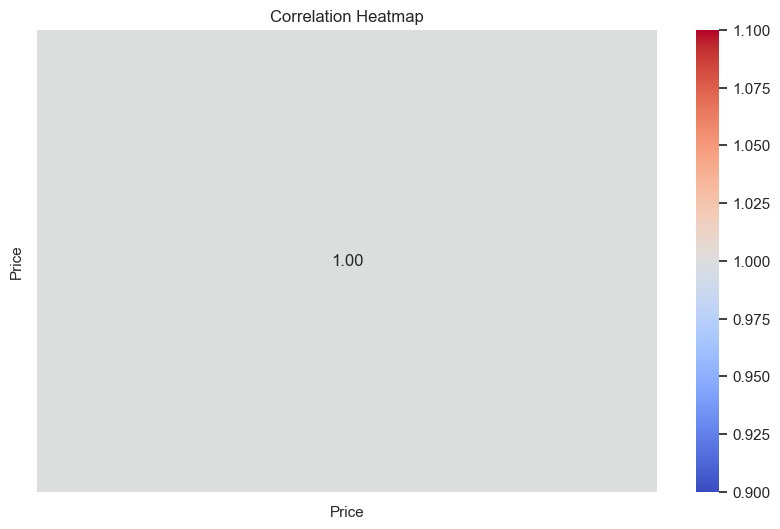

In [201]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [202]:
#FEATURE ENGINEERING

In [203]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [204]:
data["journey_day"] = pd.to_datetime(data["Date_of_Journey"],format='mixed', dayfirst=True, errors='coerce').dt.day
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"],format='mixed', dayfirst=True, errors='coerce').dt.month
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [205]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [206]:
data["dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [207]:
data.drop(["Dep_Time"],axis=1,inplace=True)

In [208]:
data["arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"],axis=1,inplace=True)

In [209]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [210]:
# Sample duration column
# df['Duration'] = ['2h 50m', '1h 15m', '5h', '50m']

# Function to convert duration
def preprocess_duration(duration):
    # Add missing 'h' or 'm' to keep consistent format
    if 'h' not in duration:
        duration = '0h ' + duration
    if 'm' not in duration:
        duration = duration + ' 0m'
        
    hours = int(duration.split('h')[0])
    minutes = int(duration.split('h')[1].split('m')[0].strip())
    return pd.Series([hours, minutes])

# Apply the function
data[['Duration_hours', 'Duration_minutes']] = data['Duration'].apply(preprocess_duration)

In [211]:
data.drop('Duration', axis=1, inplace=True)

In [212]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [213]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values
data['Airline_encoded'] = le.fit_transform(data['Airline'])
#data['Source_encoded'] = le.fit_transform(data['Source'])
data['Destination_encoded'] = le.fit_transform(data['Destination'])
data['Route_encoded'] = le.fit_transform(data['Route'])
data['Total_Stops_encoded'] = le.fit_transform(data['Total_Stops'])
data['Additional_Info_encoded']=le.fit_transform(data['Additional_Info'])

# Display the updated DataFrame
print(data)


           Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR ? DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL ? LKO ? BOM ? COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR ? NAG ? DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU ? BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU ? BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR ? DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR ? DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL ? GOI ? BOM ? COK     2 stops   

      Additional_Info  Price  journey_day  journey_

In [214]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes,Airline_encoded,Destination_encoded,Route_encoded,Total_Stops_encoded,Additional_Info_encoded
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,3,5,18,4,8
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,84,1,8
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,4,1,118,1,8
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,3,0,91,0,8
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,3,5,29,0,8


In [215]:
data.drop('Route', axis=1, inplace=True)

In [216]:
data.drop('Additional_Info', axis=1, inplace=True)

In [217]:
data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [218]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes,Airline_encoded,Destination_encoded,Route_encoded,Total_Stops_encoded,Additional_Info_encoded
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,3,5,18,4,8
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,84,1,8
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,4,1,118,1,8
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,3,0,91,0,8
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,3,5,29,0,8


In [219]:
data.drop(["Airline","Destination"],axis=1,inplace=True)
data.head()

,Source,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes,Airline_encoded,Destination_encoded,Route_encoded,Total_Stops_encoded,Additional_Info_encoded
0,Banglore,0,3897,24,3,22,20,1,10,2,50,3,5,18,4,8
1,Kolkata,2,7662,1,5,5,50,13,15,7,25,1,0,84,1,8
2,Delhi,2,13882,9,6,9,25,4,25,19,0,4,1,118,1,8
3,Kolkata,1,6218,12,5,18,5,23,30,5,25,3,0,91,0,8
4,Banglore,1,13302,1,3,16,50,21,35,4,45,3,5,29,0,8


In [220]:
Source=data["Source"]
Source=pd.get_dummies(Source,drop_first=True)
Source=Source.astype(int)
Source.head()


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [221]:
data_train=pd.concat([data,Source],axis=1)


In [222]:
data_train.drop('Source',axis=1,inplace=True)

In [223]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes,Airline_encoded,Destination_encoded,Route_encoded,Total_Stops_encoded,Additional_Info_encoded,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,3,5,18,4,8,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,84,1,8,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,4,1,118,1,8,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,3,0,91,0,8,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,3,5,29,0,8,0,0,0,0


In [224]:
#MODEL BUILDING AND MODEL EVALUATION

Mean Absolute Error (MAE): 638.9496803373667
Mean Squared Error (MSE): 3001632.676515864
Root Mean Squared Error (RMSE): 1732.5220565741333
R-squared (R²): 0.8607909824837845


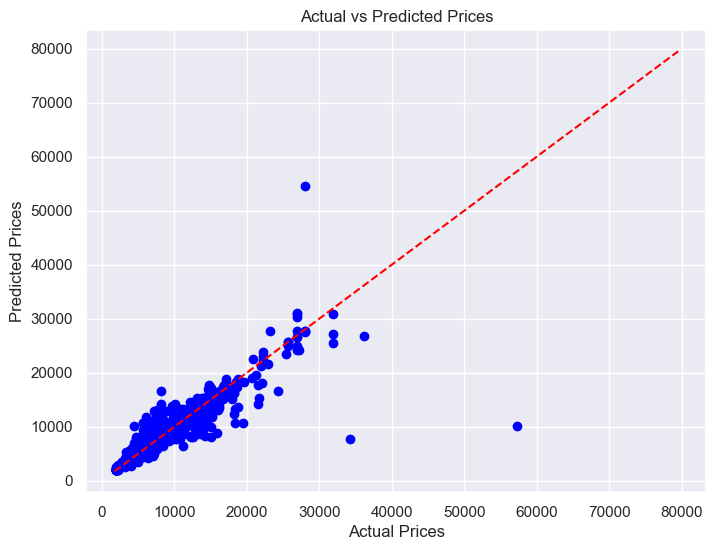

In [225]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Features (excluding the target 'Price' column)
X = data_train.drop('Price', axis=1)

# Target variable (Price)
y = data_train['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [226]:
import joblib

# Save the trained model
joblib.dump(model, 'flight_fare_model.pkl')

# Save the label encoder (if used)
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [227]:
# To load them later
loaded_model = joblib.load('flight_fare_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')


📉 Linear Regression Test Results
R2 Score: 0.5057023668298517
MAE: 2291.5127331491954


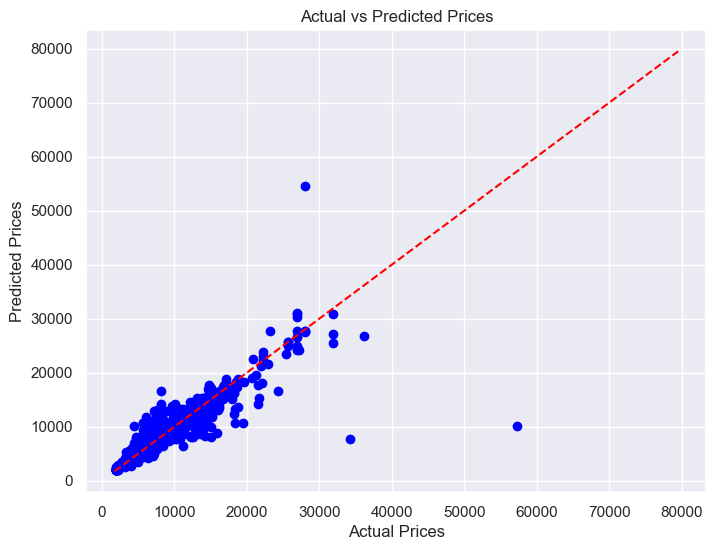

In [232]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("📉 Linear Regression Test Results")
print("R2 Score:", r2_score(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [229]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on training data
y_train_pred = model.predict(X_train)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Performance:")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))



Training Set Performance:
RMSE: 620.2199893260558
R²: 0.9818461109675298
R2: 0.8607909824837845
MAE: 638.9496803373667


XGBoost R2 Score: 0.8568595051765442
XGBoost MAE: 975.9937744140625


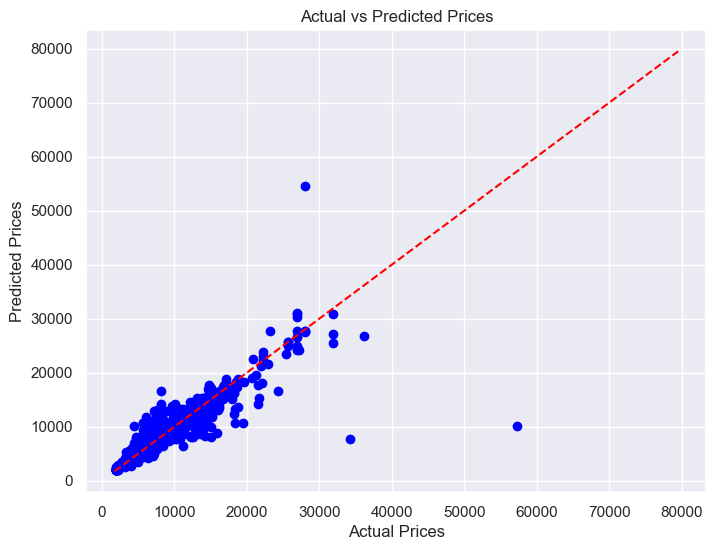

In [230]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost R2 Score:", metrics.r2_score(y_test, xgb_pred))
print("XGBoost MAE:", metrics.mean_absolute_error(y_test, xgb_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()



In [231]:
#THE MODEL BEST FITS IN XGBOOST WHEN COMPARED TO OTHER MODELS SUCH AS RANDOMFORESTREGRESSOR AND LINEARREGRESSION
#AS IT PROVIDES MORE ACCURATE PREDICTION